# Classification_Task_Flower_ Classification_manual_Split_No_of_Filter_Increase

## Importing Data

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Train_dataGen = ImageDataGenerator(rescale=1)
Test_dataGen =ImageDataGenerator(rescale=1)

## CNN Model

In [3]:
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dense,Dropout 
from keras.models import Sequential

In [4]:
model=Sequential()

In [5]:
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(5,activation='softmax'))

In [6]:
train_itt =Train_dataGen.flow_from_directory('D:\\DATA Science\\DEEP LEARNING\\CNN\Flower_Classification\\DataSet\\Flower_by_Split_folder\\train',
                                           batch_size=64,target_size=(100,100))

test_itt = Test_dataGen.flow_from_directory('D:\\DATA Science\\DEEP LEARNING\\CNN\Flower_Classification\\DataSet\\Flower_by_Split_folder\\test',
                                           batch_size=64,target_size=(100,100))

Found 3451 images belonging to 5 classes.
Found 498 images belonging to 5 classes.


In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.fit(train_itt,validation_data=test_itt,epochs=8)

Epoch 1/8
54/54 [==============================] - 359s 7s/step - loss: 32.3132 - accuracy: 0.2512 - val_loss: 1.5223 - val_accuracy: 0.3333
Epoch 2/8
54/54 [==============================] - 350s 6s/step - loss: 1.4404 - accuracy: 0.3724 - val_loss: 1.4043 - val_accuracy: 0.3996
Epoch 3/8
54/54 [==============================] - 350s 6s/step - loss: 1.3037 - accuracy: 0.4425 - val_loss: 1.3401 - val_accuracy: 0.4237
Epoch 4/8
54/54 [==============================] - 246s 5s/step - loss: 1.2608 - accuracy: 0.5059 - val_loss: 1.6334 - val_accuracy: 0.3434
Epoch 5/8
54/54 [==============================] - 128s 2s/step - loss: 1.1226 - accuracy: 0.5523 - val_loss: 1.2828 - val_accuracy: 0.5000
Epoch 6/8
54/54 [==============================] - 128s 2s/step - loss: 0.8800 - accuracy: 0.6563 - val_loss: 1.2603 - val_accuracy: 0.5321
Epoch 7/8
54/54 [==============================] - 127s 2s/step - loss: 0.7460 - accuracy: 0.7224 - val_loss: 1.3872 - val_accuracy: 0.5281
Epoch 8/8
54/54 [==

In [11]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

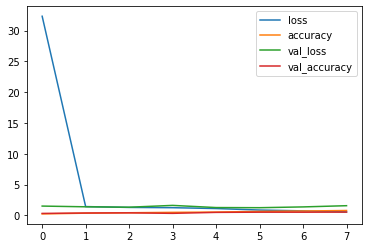

In [12]:
losses.plot()

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score

In [14]:
predictions = model.evaluate(test_itt)

8/8 [==============================] - 6s 742ms/step - loss: 1.5846 - accuracy: 0.5462


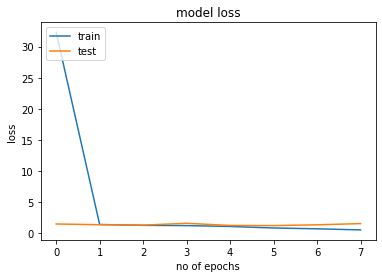

In [15]:
plt.plot(losses['loss'])
plt.plot(losses['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

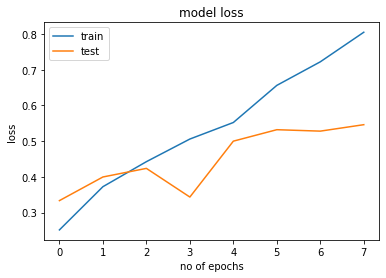

In [16]:
plt.plot(losses['accuracy'])
plt.plot(losses['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [17]:
class_label= test_itt.class_indices
class_label

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}